In [62]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools as it
import seaborn as sns

red="#e74c3c"
green="#00c370"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from scipy.stats import binom

In [3]:
from numpy.random import permutation

def abayes(data, prior, simulate, compare):
    prior_sampler = (p for p in it.cycle(permutation(prior)))
    obs_sampler = ((simulate(p), p) for p in prior_sampler)
    posterior_sampler = (p for o, p in obs_sampler if compare(o, data))
    return posterior_sampler

In [4]:
n_a = 1000
obs_a = 40

n_b = 400
obs_b = 20

In [5]:
def simulateconversion(fconv, n_visitors=1000):
    return np.random.binomial(n_visitors, fconv)

In [6]:
def compareconversion(obs1, obs2):
    return (obs1 == obs2)

In [7]:
prior_a = np.random.normal(0.035, 0.007, 1000000)
prior_a = prior_a[prior_a > 0]
prior_b = np.linspace(0, 0.1, 1000000)

In [8]:
posterior_sampler_a = abayes(obs_a, prior_a, 
                                    simulateconversion,
                                    compareconversion)

posterior_a = list(it.islice(posterior_sampler_a, 100000))

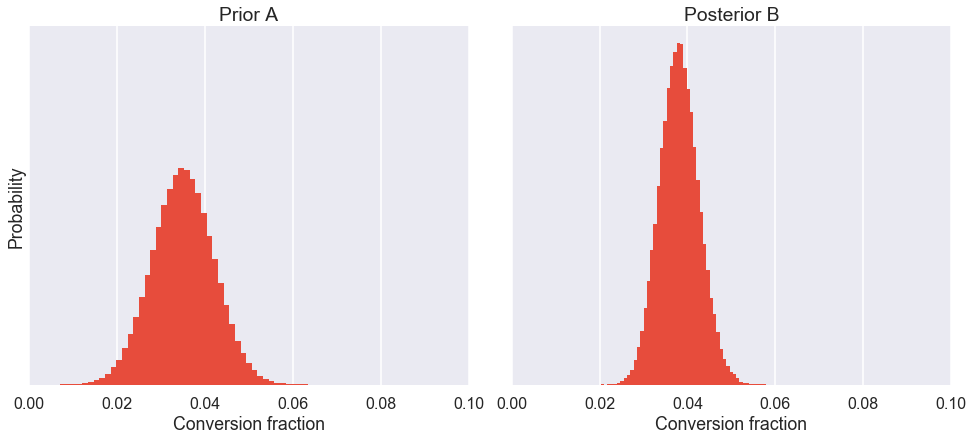

In [71]:
sns.set_context('poster')

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 6))
fig.tight_layout()
bins=50
ax[0].hist(prior_a, bins=bins, normed=True, color=red);
ax[0].set_title("Prior A")
ax[0].axes.get_yaxis().set_ticks([])
ax[1].hist(posterior_a, bins=bins, normed=True, color=red)
ax[1].set_title("Posterior B")
ax[1].set_xlim(0, 0.1);
ax[0].set_xlabel("Conversion fraction")
ax[0].set_ylabel("Probability")
ax[1].set_xlabel("Conversion fraction")
fig.savefig('img/layouta.png')

In [36]:
posterior_sampler_b = abayes(obs_b, prior_b, 
                                    lambda x: simulateconversion(x, n_visitors=n_b),
                                    compareconversion)

posterior_b = list(it.islice(posterior_sampler_b, 100000))

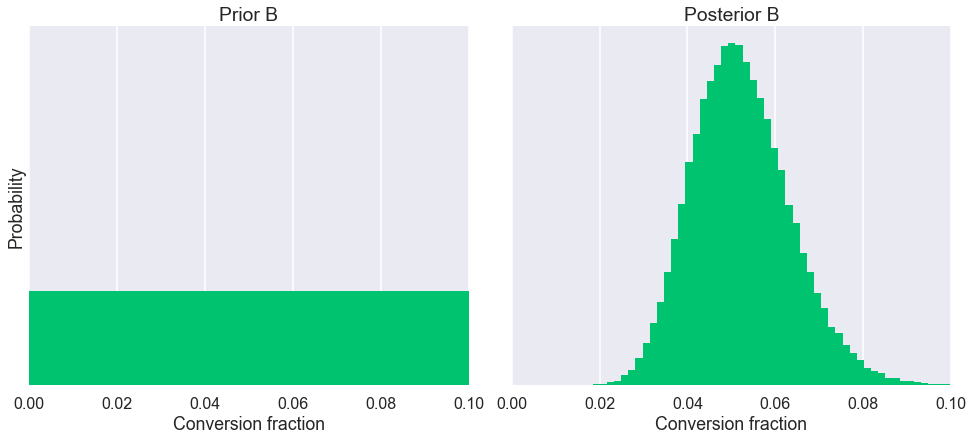

In [72]:
sns.set_context('poster')

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 6))
fig.tight_layout()
bins=50
ax[0].hist(prior_b, bins=bins, normed=True, color=green);
ax[0].set_title("Prior B")
ax[0].axes.get_yaxis().set_ticks([])
ax[1].hist(posterior_b, bins=bins, normed=True, color=green)
ax[1].set_title("Posterior B")
ax[1].set_xlim(0, 0.1);
ax[0].set_xlabel("Conversion fraction")
ax[0].set_ylabel("Probability")
ax[1].set_xlabel("Conversion fraction")
fig.savefig('img/layoutb.png')

In [39]:
(np.array(posterior_b) > np.array(posterior_a)).mean()

0.88675999999999999

In [40]:
np.median(np.array(posterior_a))

0.038079650542450022

In [41]:
agtb = [i for i, (a, b) in enumerate(zip(posterior_a, posterior_b)) if a > b]
bgta = [i for i, (a, b) in enumerate(zip(posterior_a, posterior_b)) if b > a]

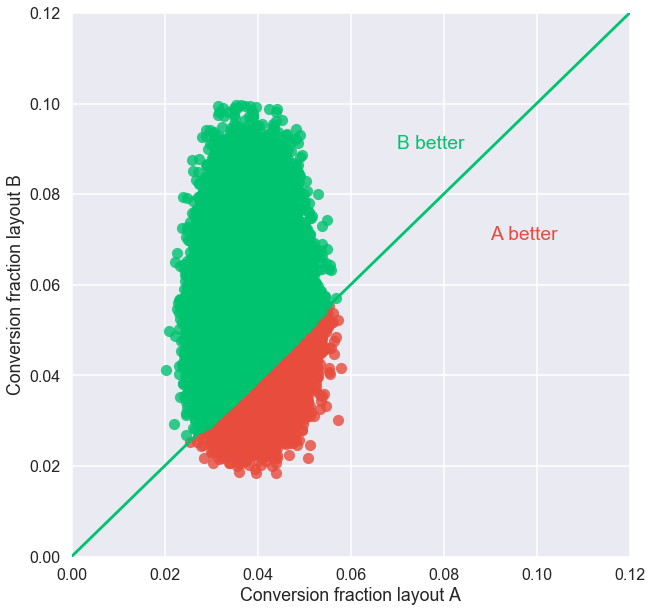

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.regplot(np.array(posterior_a)[agtb], np.array(posterior_b)[agtb], fit_reg=False, color=red)
ax = sns.regplot(np.array(posterior_a)[bgta], np.array(posterior_b)[bgta], fit_reg=False, color=green)
lim1, lim2 = 0, 0.12
ax.set_xlim(lim1, lim2)
ax.set_ylim(lim1, lim2)
ax.plot([lim1, lim2], [lim1, lim2], color=green)
ax.text(0.07, 0.09, 'B better', color=green)
ax.text(0.09, 0.07, 'A better', color=red)
ax.set_xlabel('Conversion fraction layout A')
ax.set_ylabel('Conversion fraction layout B');
fig.savefig('img/compareposteriors.png', bbox_inches='tight')

In [ ]:
p = []
for i in range(1, 5):
    print(i)
    n_visitors = i * 200
    nconv = n_visitors * (obs_b/n_b)
    posterior_sampler = abayes.abayes(nconv, prior_b, 
                                      lambda x: simulateconversion(x, n_visitors=n_visitors),
                                      compareconversion)
    p.append(list(it.islice(posterior_sampler, 100000)))

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(10, 3), sharex=False, sharey=True)
fig.tight_layout()
for i, a in enumerate(ax):
    sns.distplot(p[i], ax=a, kde=False, norm_hist=True)
    a.axes.get_yaxis().set_ticks([])
    a.axes.get_xaxis().set_ticks([0, 0.05, 0.1])
    a.set_title(str((i+1) * 200) + ' visitors')
    a.set_xlim(0, 0.1)